In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet('../data/comments_sample.parquet')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1000 non-null   object
 1   rating                1000 non-null   int64 
 2   pros                  1000 non-null   object
 3   cons                  1000 non-null   object
 4   language              1000 non-null   object
 5   comment_length        1000 non-null   int64 
 6   comment_length_group  1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


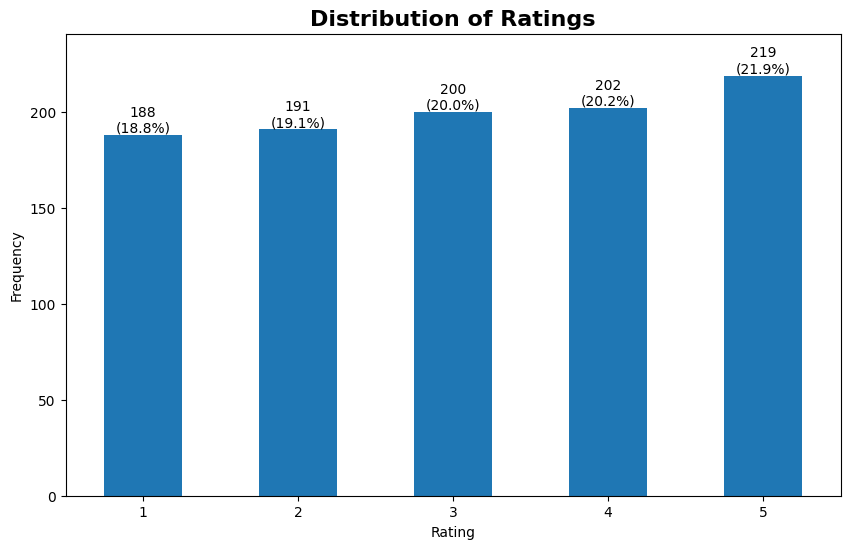

In [5]:
rating_counts = df['rating'].value_counts().sort_index()
total = rating_counts.sum()

plt.figure(figsize=(10, 6),)
ax = rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings', fontsize=16, fontweight='bold')
ax.set_ylim(0, rating_counts.max() * 1.1)

for i, count in enumerate(rating_counts):
    percentage = (count / total) * 100
    ax.text(i, count, f'{count:,}\n({percentage:.1f}%)', ha='center', va='bottom')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

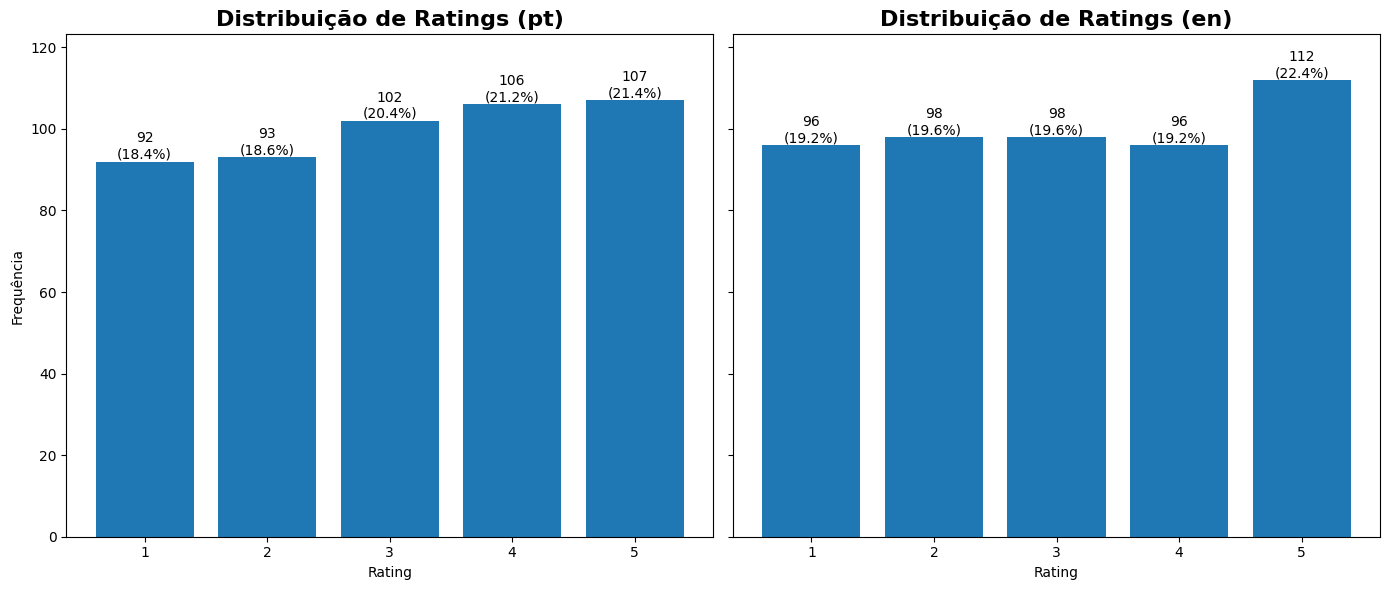

In [3]:
import matplotlib.pyplot as plt

# Filtrar dados por language
df_pt = df[df['language'] == 'pt']
df_en = df[df['language'] == 'en']

# Contagem de ratings
counts_pt = df_pt['rating'].value_counts().sort_index()
counts_en = df_en['rating'].value_counts().sort_index()

# Totais para cálculo de porcentagem
total_pt = counts_pt.sum()
total_en = counts_en.sum()

# Cria figura com dois eixos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Primeiro gráfico: português
ax = axes[0]
ax.bar(counts_pt.index, counts_pt.values)
ax.set_title('Distribuição de Ratings (pt)', fontsize=16, fontweight='bold')
ax.set_xlabel('Rating')
ax.set_ylabel('Frequência')
ax.set_ylim(0, max(counts_pt.max(), counts_en.max()) * 1.1)
for i, count in enumerate(counts_pt):
    pct = (count / total_pt) * 100
    ax.text(counts_pt.index[i], count, f'{count:,}\n({pct:.1f}%)', 
            ha='center', va='bottom')
ax.set_xticks(counts_pt.index)
ax.set_xticklabels(counts_pt.index, rotation=0)

# Segundo gráfico: inglês
ax = axes[1]
ax.bar(counts_en.index, counts_en.values)
ax.set_title('Distribuição de Ratings (en)', fontsize=16, fontweight='bold')
ax.set_xlabel('Rating')
for i, count in enumerate(counts_en):
    pct = (count / total_en) * 100
    ax.text(counts_en.index[i], count, f'{count:,}\n({pct:.1f}%)', 
            ha='center', va='bottom')
ax.set_xticks(counts_en.index)
ax.set_xticklabels(counts_en.index, rotation=0)

plt.tight_layout()
plt.show()


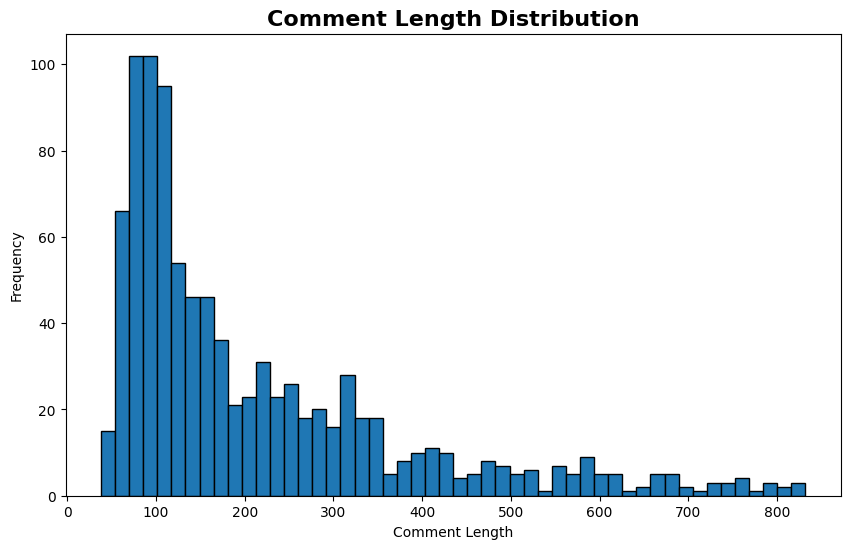

In [6]:
max_length = df['comment_length'].quantile(0.95)
filtered = df[df['comment_length'] <= max_length]

plt.figure(figsize=(10,6))
plt.hist(filtered['comment_length'], bins=50, edgecolor='black')
plt.title('Comment Length Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

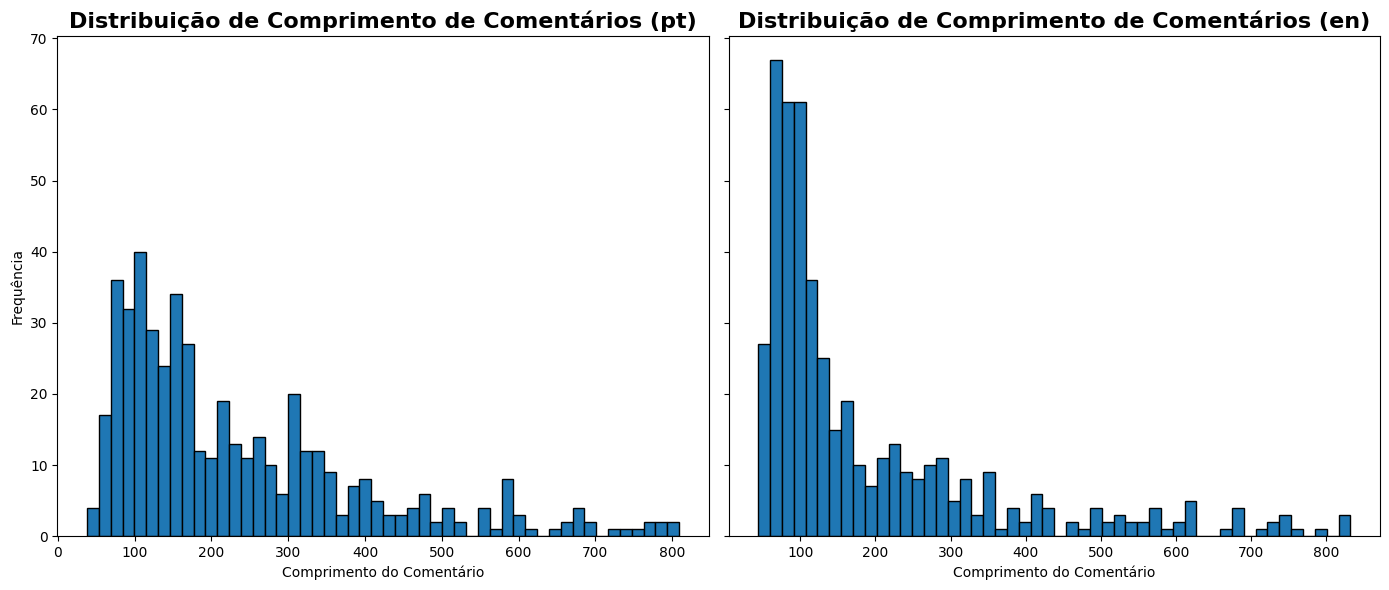

In [ ]:
# Calcula o 95º percentil global e filtra outliers
max_length = df['comment_length'].quantile(0.95)
filtered = df[df['comment_length'] <= max_length]

# Filtra por language
filtered_pt = filtered[filtered['language'] == 'pt']
filtered_en = filtered[filtered['language'] == 'en']

# Cria figura com dois eixos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Histograma para português
axes[0].hist(filtered_pt['comment_length'], bins=50, edgecolor='black')
axes[0].set_title('Distribuição de Comprimento de Comentários (pt)', 
                  fontsize=16, fontweight='bold')
axes[0].set_xlabel('Comprimento do Comentário')
axes[0].set_ylabel('Frequência')

# Histograma para inglês
axes[1].hist(filtered_en['comment_length'], bins=50, edgecolor='black')
axes[1].set_title('Distribuição de Comprimento de Comentários (en)', 
                  fontsize=16, fontweight='bold')
axes[1].set_xlabel('Comprimento do Comentário')

plt.tight_layout()
plt.show()
